In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from pandas.api.types import is_numeric_dtype


In [2]:
customer_data = pd.read_csv('/home/vitquay1708/Study_Space/ml/btl/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
customer_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
customer_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


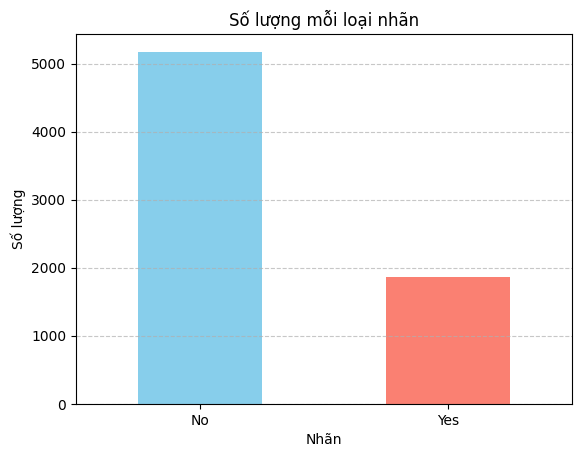

In [8]:
label_counts = customer_data['Churn'].value_counts()
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Số lượng mỗi loại nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [9]:
customer_data['TotalCharges'] = pd.to_numeric(customer_data.TotalCharges, errors='coerce')
customer_data.isnull().sum()


customer_data[np.isnan(customer_data['TotalCharges'])]
customer_data.fillna(customer_data['TotalCharges'].mean(), inplace = True)
customer_data.isnull().sum()



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
X = customer_data.drop(['customerID', 'Churn'], axis = 1)
y = customer_data['Churn'].map({'No':0, 'Yes':1})

## Chuẩn hóa dữ liệu dạng số

In [11]:
std_scaler = StandardScaler()
numeric_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numeric_col] = std_scaler.fit_transform(X[numeric_col])
print(X.head(5))

   gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
0  Female              0     Yes         No -1.277445           No   
1    Male              0      No         No  0.066327          Yes   
2    Male              0      No         No -1.236724          Yes   
3    Male              0      No         No  0.514251           No   
4  Female              0      No         No -1.236724          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes  

# Sử dụng One-hot Encoding với các cột có dạng object

In [12]:
X_onehot = pd.get_dummies(X, dtype = int)
print(X_onehot.head(5))

   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
0              0 -1.277445       -1.160323     -0.994971              1   
1              0  0.066327       -0.259629     -0.173876              0   
2              0 -1.236724       -0.362660     -0.960399              0   
3              0  0.514251       -0.746535     -0.195400              0   
4              0 -1.236724        0.197365     -0.941193              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0   

In [13]:
# from sklearn.preprocessing import LabelEncoder
# for col in X.columns:
#   if X[col].dtype == 'object':
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col])
# print(X.head(5))

In [14]:
from sklearn.model_selection import train_test_split
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(X_onehot, y, train_size=0.8, random_state=42, stratify= y)

## Huấn luyện mô hình với dữ liệu sau khi One-hot

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
lr = LogisticRegression(max_iter = 10000, penalty = 'l2')
lr.fit(X_train_onehot, y_train_onehot)
y_pred = lr.predict(X_test_onehot)
print(accuracy_score(y_test_onehot, y_pred))
print(recall_score(y_test_onehot, y_pred))
print(precision_score(y_test_onehot, y_pred))
print(f1_score(y_test_onehot, y_pred))
print(confusion_matrix(y_test_onehot, y_pred))

0.8055358410220014
0.5588235294117647
0.6572327044025157
0.6040462427745664
[[926 109]
 [165 209]]


## Sử dụng Label Encoder

In [16]:
X_label = X
for col in X_label.columns:
  if X_label[col].dtype == 'object':
    le = LabelEncoder()
    X_label[col] = le.fit_transform(X_label[col])
print(X_label.head(5))

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1     

In [17]:
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y, train_size=0.6, random_state=42, stratify= y)

## Huấn luyện mô hình với dữ liệu Labeled

In [18]:
lr_label = LogisticRegression(max_iter=10000, penalty='l2')
lr_label.fit(X_train_label, y_train_label)
y_pred_label = lr_label.predict(X_test_label)
print(accuracy_score(y_test_label, y_pred_label))
print(recall_score(y_test_label, y_pred_label))
print(precision_score(y_test_label, y_pred_label))
print(f1_score(y_test_label, y_pred_label))
print(confusion_matrix(y_test_label, y_pred_label))

0.8002129169623847
0.5561497326203209
0.642967542503864
0.596415770609319
[[1839  231]
 [ 332  416]]


# Giảm chiều

## PCA

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_onehot)
X_test_pca = pca.transform(X_test_onehot)
print(X_train_pca.shape)
print(y_train_onehot.shape)

(5634, 15)
(5634,)


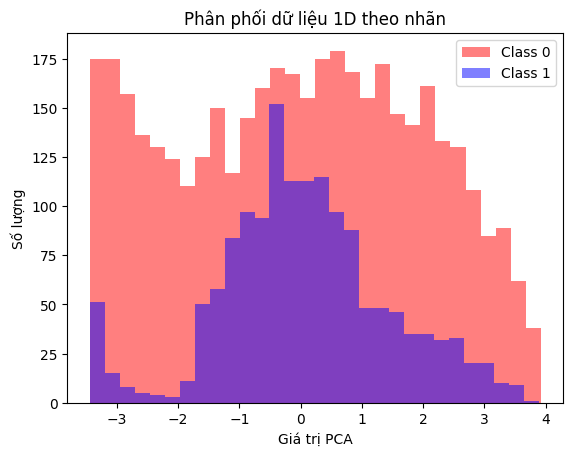

In [20]:
for label, color in zip(np.unique(y_train_onehot), ['red', 'blue']):
    plt.hist(X_train_pca[y_train_onehot == label, 0], bins=30, color=color, alpha=0.5, label=f'Class {label}')

plt.title('Phân phối dữ liệu 1D theo nhãn')
plt.xlabel('Giá trị PCA')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

In [21]:
lr_pca = LogisticRegression(max_iter = 100, C = 1, class_weight='balanced', random_state=42)
lr_pca.fit(X_train_pca, y_train_onehot)
y_pred_pca = lr_pca.predict(X_test_pca)
print('PCA: ')
print('Accuracy: ', accuracy_score(y_test_onehot, y_pred_pca))
print('Recall: ',recall_score(y_test_onehot, y_pred_pca))
print('Precision: ',precision_score(y_test_onehot, y_pred_pca))
print('F1: ',f1_score(y_test_onehot, y_pred_pca))
print('Confusion matrix: \n',confusion_matrix(y_test_onehot, y_pred_pca))

PCA: 
Accuracy:  0.7388218594748048
Recall:  0.7727272727272727
Precision:  0.5052447552447552
F1:  0.6109936575052854
Confusion matrix: 
 [[752 283]
 [ 85 289]]


## LDA

In [22]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_onehot, y_train_onehot)
X_test_lda = lda.transform(X_test_onehot)

In [23]:
lr_lda = LogisticRegression(max_iter=10000, penalty='l2', random_state=42)
lr_lda.fit(X_train_lda, y_train_onehot)
y_pred_lda = lr_lda.predict(X_test_lda)
print('LDA: ')
print('Accuracy: ', accuracy_score(y_test_onehot, y_pred_lda))
print('Recall: ', recall_score(y_test_onehot, y_pred_lda))
print('Precision: ',precision_score(y_test_onehot, y_pred_lda))
print('F1: ', f1_score(y_test_onehot, y_pred_lda))
print('Confusion matrix: \n',confusion_matrix(y_test_onehot, y_pred_lda))

LDA: 
Accuracy:  0.794180269694819
Recall:  0.5294117647058824
Precision:  0.6346153846153846
F1:  0.577259475218659
Confusion matrix: 
 [[921 114]
 [176 198]]


# Final

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from typing import Tuple, List
import kagglehub
import os

/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Hàm tiền xử lý dữ liệu

In [25]:
def preprocess_data(filepath):
    df = pd.read_csv(filepath)
    print("Raw data information:")
    print("Rows:", df.shape[0], "Columns:", df.shape[1])
    print("Columns:", list(df.columns))

    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    print("Missing values before:", df.isnull().sum().sum())
    df = df.dropna()
    print("Missing values after:", df.isnull().sum().sum())

    df = df.drop(columns=["customerID"])

    X = df.drop("Churn", axis=1)
    y = df["Churn"]

    y_encoded = LabelEncoder().fit_transform(y)
    X_encoded = pd.get_dummies(X, drop_first=True)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    print("Final shape:", X_scaled.shape)
    print("Number of features:", X_scaled.shape[1])

    return df, X_scaled, y_encoded, X_encoded.columns.tolist()

## Tìm số chiều tối ưu cho PCA

In [26]:
def find_optimal_components_by_variance(X_scaled, variance_threshold):

    pca = PCA(n_components=None)
    pca.fit(X_scaled)

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    optimal_components = np.argmax(cumulative_variance >= variance_threshold) + 1

    return optimal_components

## Giảm chiều PCA

In [27]:
def perform_pca(X_scaled, n_components):

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio) * 100

    for i in range(n_components):
        print(f"Principal Component {i+1}: {explained_variance_ratio[i]*100:.2f}%   |   Cumulative: {cumulative_variance[i]:.2f}%")

    print("-" * 42)

    total_variance_captured = np.sum(explained_variance_ratio)
    information_loss = 1 - total_variance_captured

    print(f"Total variance captured by {n_components} components: {total_variance_captured:.2%}")
    print(f"Amount of information lost after reduction: {information_loss:.2%}")
    print("-" * 42)

    return X_pca, pca

## Giảm chiều bằng LDA

In [28]:
def perform_lda(X_scaled, y_encoded):

    lda = LDA(n_components=1)
    X_lda = lda.fit_transform(X_scaled, y_encoded)
    class_labels = np.where(y_encoded == 1, "Churn", "No Churn")
    df_temp = pd.DataFrame({"LDA1": X_lda.flatten(), "Class": class_labels})

    print("LDA Class Means")
    print(df_temp.groupby("Class").mean())

    return X_lda, lda

In [29]:
filepath = '/home/vitquay1708/Study_Space/ml/btl/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df_raw, X_processed, y_processed, feature_names = preprocess_data(filepath)
print(y_processed)


Raw data information:
Rows: 7043 Columns: 21
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Missing values before: 11
Missing values after: 0
Final shape: (7032, 30)
Number of features: 30
[0 0 1 ... 0 1 0]


In [30]:
train_size_arr = [0.6, 0.7, 0.8]

## Huấn luyện với dữ liệu gốc

In [36]:
for size in train_size_arr:
  print('Train size: ', size)
  X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, train_size=size, random_state=42, stratify=y_processed)
  lr = LogisticRegression(max_iter=10000, class_weight='balanced', penalty='l2', random_state=42, C = 1)
  lr.fit(X_train, y_train)
  print('Train accuracy: ',  lr.score(X_train, y_train))
  y_pred = lr.predict(X_test)
  print('Test accuracy: ', accuracy_score(y_test, y_pred))
  print('Recall: ', recall_score(y_test, y_pred))
  print('Precision: ', precision_score(y_test, y_pred))
  print('F1: ',f1_score(y_test, y_pred))
  print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
  print()
  



Train size:  0.6
Train accuracy:  0.7511258592083432
Test accuracy:  0.7372911482403128
Recall:  0.8141711229946524
Precision:  0.5037220843672456
F1:  0.6223811957077159
Confusion matrix: 
 [[1465  600]
 [ 139  609]]

Train size:  0.7
Train accuracy:  0.7539618041446566
Test accuracy:  0.7345971563981043
Recall:  0.7914438502673797
Precision:  0.5005636978579482
F1:  0.6132596685082873
Confusion matrix: 
 [[1106  443]
 [ 117  444]]

Train size:  0.8
Train accuracy:  0.7544888888888889
Test accuracy:  0.7256574271499645
Recall:  0.7941176470588235
Precision:  0.4900990099009901
F1:  0.6061224489795919
Confusion matrix: 
 [[724 309]
 [ 77 297]]



## Huấn luyện với phương pháp giảm chiều dữ diệu

### PCA

In [32]:
for size in train_size_arr:
  print('Train size: ', size)
  X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, train_size=size, random_state=42, stratify=y_processed)
  #Optimal components
  best_dim = find_optimal_components_by_variance(X_scaled=X_train, variance_threshold=0.9)
  # PCA
  X_train_pca, pca = perform_pca(X_train, best_dim)
  X_test_pca = pca.transform(X_test)
  print()
  #Logistic Regression
  lr_pca = LogisticRegression(max_iter=10000, class_weight='balanced', penalty='l2', random_state=42)
  lr_pca.fit(X_train_pca, y_train)
  print('Train accuracy: ',  lr_pca.score(X_train_pca, y_train))
  y_pred_pca = lr_pca.predict(X_test_pca)
  print('Test accuracy: ', accuracy_score(y_test, y_pred_pca))
  print('Recall: ', recall_score(y_test, y_pred_pca))
  print('Precision: ', precision_score(y_test, y_pred_pca))
  print('F1: ', f1_score(y_test, y_pred_pca))
  print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_pca))
  print()

Train size:  0.6
Principal Component 1: 33.35%   |   Cumulative: 33.35%
Principal Component 2: 12.06%   |   Cumulative: 45.41%
Principal Component 3: 8.82%   |   Cumulative: 54.22%
Principal Component 4: 4.74%   |   Cumulative: 58.96%
Principal Component 5: 4.19%   |   Cumulative: 63.15%
Principal Component 6: 4.08%   |   Cumulative: 67.23%
Principal Component 7: 3.80%   |   Cumulative: 71.03%
Principal Component 8: 3.34%   |   Cumulative: 74.36%
Principal Component 9: 3.13%   |   Cumulative: 77.50%
Principal Component 10: 2.93%   |   Cumulative: 80.43%
Principal Component 11: 2.64%   |   Cumulative: 83.07%
Principal Component 12: 2.38%   |   Cumulative: 85.45%
Principal Component 13: 2.28%   |   Cumulative: 87.73%
Principal Component 14: 2.08%   |   Cumulative: 89.81%
Principal Component 15: 1.99%   |   Cumulative: 91.80%
------------------------------------------
Total variance captured by 15 components: 91.80%
Amount of information lost after reduction: 8.20%
-----------------------

## LDA

In [33]:
for size in train_size_arr:
  print('Train size: ', size)
  X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, train_size=size, random_state=42, stratify=y_processed)
  # LDA
  X_train_lda, lda = perform_lda(X_train, y_train)
  X_test_lda = lda.transform(X_test)
  print()
  #Logistic Regression
  lr_lda = LogisticRegression(max_iter=10000, class_weight='balanced', penalty='l2', random_state=42)
  lr_lda.fit(X_train_lda, y_train)
  print('Train accuracy: ',  lr_lda.score(X_train_lda, y_train))
  y_pred_lda = lr_lda.predict(X_test_lda)
  print('Test accuracy: ', accuracy_score(y_test, y_pred_lda))
  print('Recall: ', recall_score(y_test, y_pred_lda))
  print('Precision: ', precision_score(y_test, y_pred_lda))
  print('F1-score: ', f1_score(y_test, y_pred_lda))
  print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_lda))
  print()

Train size:  0.6
LDA Class Means
              LDA1
Class             
Churn     1.066129
No Churn -0.385775

Train accuracy:  0.7617918938136999
Test accuracy:  0.7575542125844295
Recall:  0.7794117647058824
Precision:  0.53
F1-score:  0.6309523809523809
Confusion matrix: 
 [[1548  517]
 [ 165  583]]

Train size:  0.7
LDA Class Means
              LDA1
Class             
Churn     1.064438
No Churn -0.385248

Train accuracy:  0.7639171068671272
Test accuracy:  0.7554502369668247
Recall:  0.7575757575757576
Precision:  0.5279503105590062
F1-score:  0.6222547584187409
Confusion matrix: 
 [[1169  380]
 [ 136  425]]

Train size:  0.8
LDA Class Means
              LDA1
Class             
Churn     1.060481
No Churn -0.383879

Train accuracy:  0.7648
Test accuracy:  0.7484008528784648
Recall:  0.7513368983957219
Precision:  0.518450184501845
F1-score:  0.6135371179039302
Confusion matrix: 
 [[772 261]
 [ 93 281]]

